###Aim
Study the behaviour of a string grammar . 

In [1]:
%matplotlib inline
import networkx as nx

In [2]:
from logging import getLogger 
from eden.util import configure_logging
configure_logging(getLogger('root'),verbosity=1)

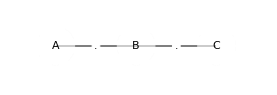

In [18]:
G=nx.path_graph(3)
G.node[0]['label']='A'
G.node[1]['label']='B'
G.node[2]['label']='C'
G.edge[0][1]['label']='.'
G.edge[1][2]['label']='.'

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g1 = G.copy()

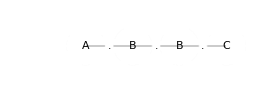

In [4]:
G=nx.path_graph(4)
G.node[0]['label']='A'
G.node[1]['label']='B'
G.node[2]['label']='B'
G.node[3]['label']='C'
G.edge[0][1]['label']='.'
G.edge[1][2]['label']='.'
G.edge[2][3]['label']='.'

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g2 = G.copy()

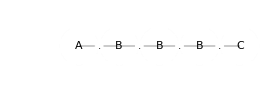

In [5]:
G=nx.path_graph(5)
G.node[0]['label']='A'
G.node[1]['label']='B'
G.node[2]['label']='B'
G.node[3]['label']='B'
G.node[4]['label']='C'
G.edge[0][1]['label']='.'
G.edge[1][2]['label']='.'
G.edge[2][3]['label']='.'
G.edge[3][4]['label']='.'

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g3 = G.copy()

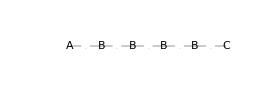

In [13]:
G=nx.path_graph(6)
G.node[0]['label']='A'
G.node[1]['label']='B'
G.node[2]['label']='B'
G.node[3]['label']='B'
G.node[4]['label']='B'
G.node[5]['label']='C'
G.edge[0][1]['label']='.'
G.edge[1][2]['label']='.'
G.edge[2][3]['label']='.'
G.edge[3][4]['label']='.'
G.edge[4][5]['label']='.'


from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g4 = G.copy()

In [14]:
%%time
import graphlearn.utils.draw as myutils
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
gr = [g1,g2,g3,g4,g4]

sampler=gl.GraphLearnSampler(radius_list=[0,1],thickness_list=[2], complexity=2)
sampler.fit(gr,n_jobs=-1, core_interface_pair_remove_threshold=1, interface_remove_threshold=1)

CPU times: user 867 ms, sys: 253 ms, total: 1.12 s
Wall time: 3.86 s


interface: 401890


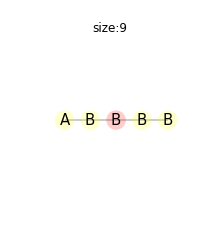

interface: 662886


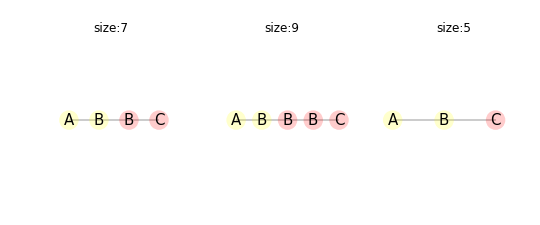

interface: 629289


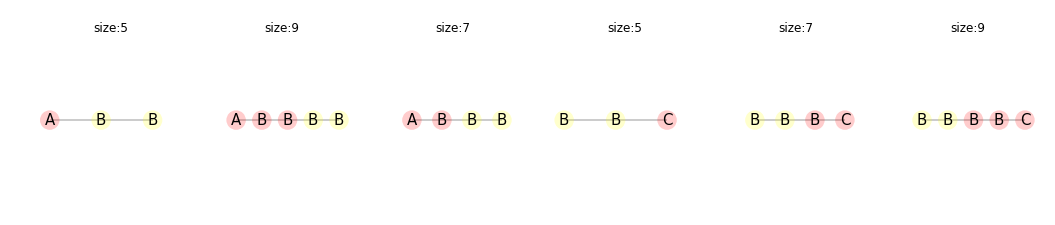

interface: 224428


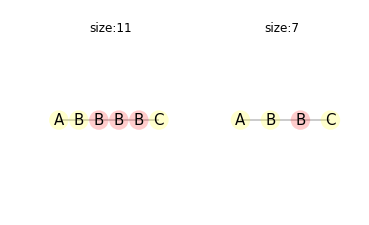

interface: 843837


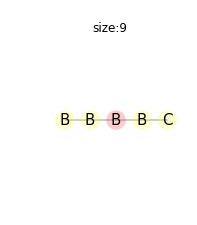

interface: 931919


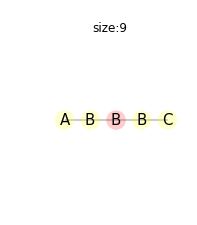

interface: 427197


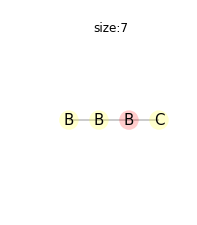

interface: 329401


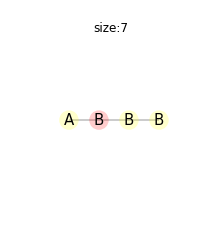

interface: 631003


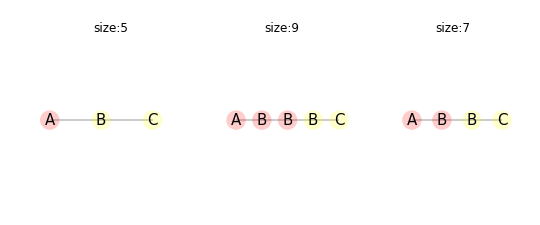

interface: 376477


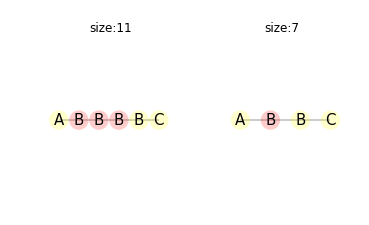

In [15]:
myutils.draw_grammar(sampler.local_substitutable_graph_grammar.grammar,n_productions=None,
                     n_graphs_per_line=7, size=3, 
                     colormap='autumn', invert_colormap=True,
                     vertex_alpha=0.2, edge_alpha=0.2, node_size=380,
                     prog='circo', size_x_to_y_ratio=3)

how often do we see interfacehashes
# productions: 21
x = # interfaces (total: 10)
y=numberofcores(ihash), y=sumOfCoreCounts(ihash)


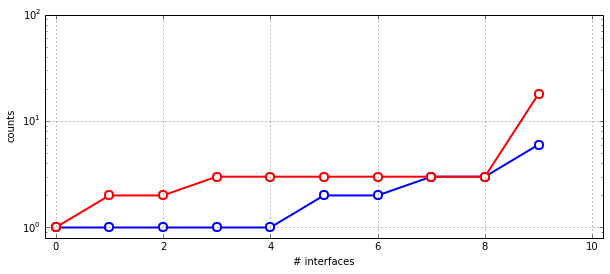

how often was this corehash seen?
x = # cores (total: 8)
y = inYinterfaces(chash), y= sumOfCountOverAllInterfaces(chash)


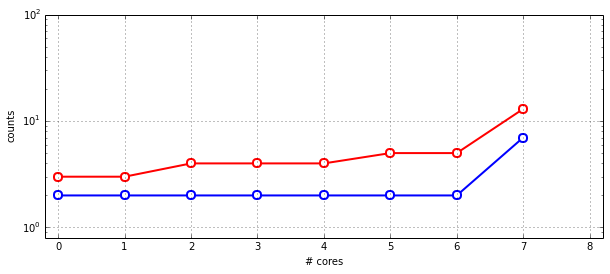

histogram
# productions: 21
distinct cores: 8 (seen on x axis)
interfaces with x many cores were observed y many times. 


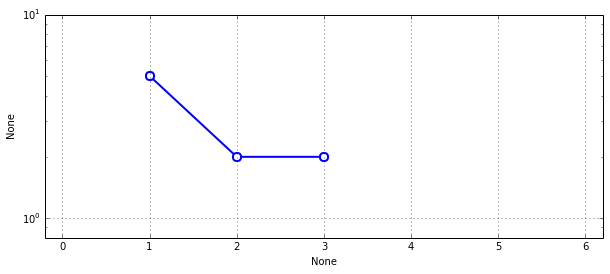

In [16]:
myutils.draw_grammar_stats(sampler.local_substitutable_graph_grammar.grammar)

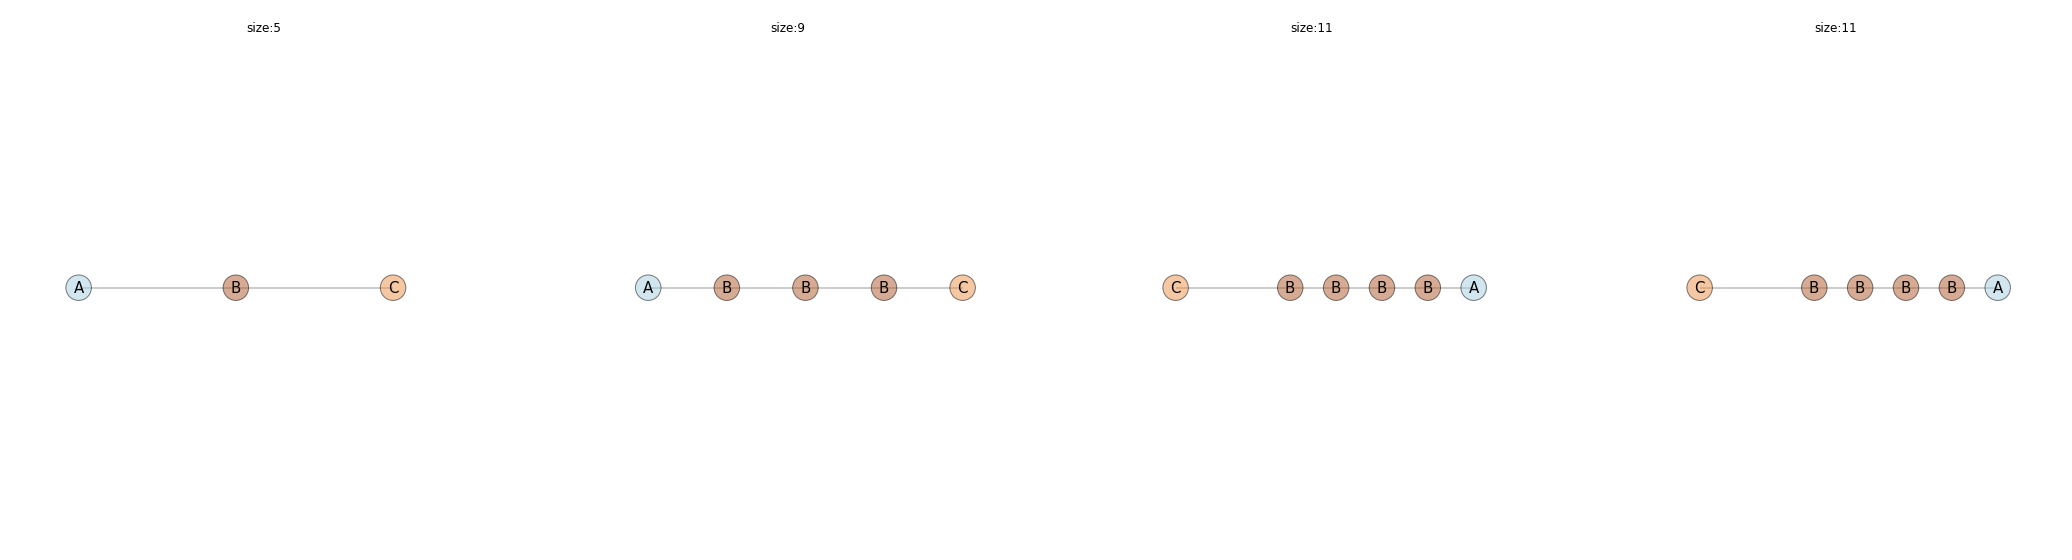

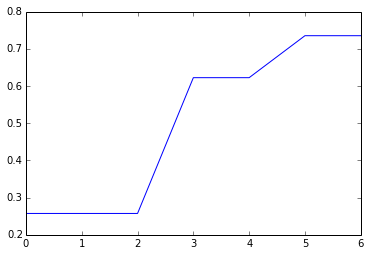

In [17]:
#sample
seed_graphs = [g1]
n_steps=6
sampling_interval=int(n_steps/6)+1
graphs = sampler.sample(seed_graphs,
                        same_radius=False,
                        same_core_size=False,
                        sampling_interval=sampling_interval,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=-1,
                        annealing_factor=1.3)
#draw
import matplotlib.pyplot as plt
scores=[]
for graph in list(graphs):
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    myutils.draw_graph_set(path_graphs,
                           n_graphs_per_line=4, size=9,
                           prog='circo',
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                           vertex_alpha=0.5, edge_alpha=0.2, node_size=650)
    
for h in scores: plt.plot(h)
plt.show()

##Note:
given that the string with more occurrences of 'b' is more frequent, then the tendency is to move towards a larger number of bs.

Note that if we keep on increasing the number of copies of one instance this becomes so popular that both the 50% least dense and the 50% more dense will contain the same number of instances and hence the direction of the signal will vanish.  